In [1]:
import pandas as pd
import numpy as np

for mod in pd,np:
    print(mod.__name__, mod.__version__)

pandas 1.1.5
numpy 1.18.5


### 一、时序中的基本对象
时间序列的概念在日常生活中十分常见，但对于一个具体的时序事件而言，可以从多个时间对象的角度来描述。例如2020年9月7日周一早上8点整需要到教室上课，这个课会在当天早上10点结束，其中包含了哪些时间概念？

第一，会出现时间戳（Date times）的概念，即'2020-9-7 08:00:00'和'2020-9-7 10:00:00'这两个时间点分别代表了上课和下课的时刻，在pandas中称为Timestamp。同时，一系列的时间戳可以组成DatetimeIndex，而将它放到Series中后，Series的类型就变为了datetime64[ns]，如果有涉及时区则为datetime64[ns, tz]，其中tz是timezone的简写。

第二，会出现时间差（Time deltas）的概念，即上课需要的时间，两个Timestamp做差就得到了时间差，pandas中利用Timedelta来表示。类似的，一系列的时间差就组成了TimedeltaIndex， 而将它放到Series中后，Series的类型就变为了timedelta64[ns]。

第三，会出现时间段（Time spans）的概念，即在8点到10点这个区间都会持续地在上课，在pandas利用Period来表示。类似的，一系列的时间段就组成了PeriodIndex， 而将它放到Series中后，Series的类型就变为了Period。

第四，会出现日期偏置（Date offsets）的概念，假设你只知道9月的第一个周一早上8点要去上课，但不知道具体的日期，那么就需要一个类型来处理此类需求。再例如，想要知道2020年9月7日后的第30个工作日是哪一天，那么时间差就解决不了你的问题，从而pandas中的DateOffset就出现了。同时，pandas中没有为一列时间偏置专门设计存储类型，理由也很简单，因为需求比较奇怪，一般来说我们只需要对一批时间特征做一个统一的特殊日期偏置。

### 二、时间戳
1. Timestamp的构造与属性
 - 单个时间戳的生成利用pd.Timestamp实现，一般而言的常见日期格式都能被成功地转换：

In [2]:
ts1= pd.Timestamp('20210110')
ts2 =pd.Timestamp('2021-01-10 08:25:45')
ts1, ts2

(Timestamp('2021-01-10 00:00:00'), Timestamp('2021-01-10 08:25:45'))

In [3]:
# 通过year, month, day, hour, min, second可以获取具体的数值：
print(ts1.month, ts1.hour)
print(ts2.day, ts2.second)

1 0
10 45


- 在pandas中，时间戳的最小精度为纳秒ns，由于使用了64位存储，可以表示的时间范围大约可以如下计算：
 - Time,Range=264109×60×60×24×365≈585(Years)

In [4]:
a, b = pd.Timestamp.max, pd.Timestamp.min
print('max Timestamp is :', a)
print('min Timestamp is :', b)
print('Time period is: ', a.year - b.year)

max Timestamp is : 2262-04-11 23:47:16.854775807
min Timestamp is : 1677-09-21 00:12:43.145225
Time period is:  585


2. Datetime序列的生成
 - 一组时间戳可以组成时间序列，可以用to_datetime和date_range来生成。
   - 其中，to_datetime能够把一列时间戳格式的对象转换成为datetime64[ns]类型的时间序列：

In [8]:
df = pd.read_csv('learn_pandas.csv')
df.head()

,School,Grade,Name,Gender,Height,Weight,Transfer,Test_Number,Test_Date,Time_Record
0,Shanghai Jiao Tong University,Freshman,Gaopeng Yang,Female,158.9,46.0,N,1,2019/10/5,0:04:34
1,Peking University,Freshman,Changqiang You,Male,166.5,70.0,N,1,2019/9/4,0:04:20
2,Shanghai Jiao Tong University,Senior,Mei Sun,Male,188.9,89.0,N,2,2019/9/12,0:05:22
3,Fudan University,Sophomore,Xiaojuan Sun,Female,NaN,41.0,N,2,2020/1/3,0:04:08
4,Fudan University,Sophomore,Gaojuan You,Male,174.0,74.0,N,2,2019/11/6,0:05:22


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   School       200 non-null    object 
 1   Grade        200 non-null    object 
 2   Name         200 non-null    object 
 3   Gender       200 non-null    object 
 4   Height       183 non-null    float64
 5   Weight       189 non-null    float64
 6   Transfer     188 non-null    object 
 7   Test_Number  200 non-null    int64  
 8   Test_Date    200 non-null    object 
 9   Time_Record  200 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 15.8+ KB


 - 可以看到 Test_Date是object类型，可以用to_datetime转化成时间序列,即datetime64[ns]

In [11]:
s = pd.to_datetime(df.Test_Date)
s.head()

0   2019-10-05
1   2019-09-04
2   2019-09-12
3   2020-01-03
4   2019-11-06
Name: Test_Date, dtype: datetime64[ns]

In [12]:
# 在极少数情况，时间戳的格式不满足转换时，可以强制使用format进行匹配：
temp = pd.to_datetime(['2020\\1\\1','2020\\1\\3'],format='%Y\\%m\\%d')
temp

DatetimeIndex(['2020-01-01', '2020-01-03'], dtype='datetime64[ns]', freq=None)

注意上面由于传入的是列表，而非pandas内部的Series，因此返回的是DatetimeIndex，如果想要转为datetime64[ns]的序列，需要显式用Series转化：

In [13]:
pd.Series(temp)

0   2020-01-01
1   2020-01-03
dtype: datetime64[ns]

另外，还存在一种把表的多列时间属性拼接转为时间序列的to_datetime操作，此时的列名必须和以下给定的时间关键词列名一致：

In [14]:
df_date_cols = pd.DataFrame({'year': [2020, 2020],
                             'month': [1, 1],
                             'day': [1, 2],
                             'hour': [10, 20],
                             'minute': [30, 50],
                             'second': [20, 40]})
df_date_cols

,year,month,day,hour,minute,second
0,2020,1,1,10,30,20
1,2020,1,2,20,50,40


In [15]:
c

0   2020-01-01 10:30:20
1   2020-01-02 20:50:40
dtype: datetime64[ns]

In [16]:
# 试一下如果不指定列明为Year/month等是否可以
test_cols = pd.DataFrame({'y': [2020, 2020],
                             'm': [1, 1],
                             'd': [1, 2],
                             'hh': [10, 20],
                             'mm': [30, 50],
                             'se': [20, 40]})
test_cols

,y,m,d,hh,mm,se
0,2020,1,1,10,30,20
1,2020,1,2,20,50,40


In [24]:
pd.to_datetime(test_cols)

ValueError: to assemble mappings requires at least that [year, month, day] be specified: [day,month,year] is missing

 - 必须要指定列明为[year, month, day]

date_range是一种生成连续间隔时间的一种方法，其重要的参数为start, end, freq, periods，
它们分别表示开始时间，结束时间，时间间隔，时间戳个数。其中，四个中的三个参数决定了，那么剩下的一个就随之确定了。
这里要注意，开始或结束日期如果作为端点则它会被包含：

In [26]:
pd.date_range('2020-1-1','2020-1-21', freq='10D') # 包含

DatetimeIndex(['2020-01-01', '2020-01-11', '2020-01-21'], dtype='datetime64[ns]', freq='10D')

In [27]:
pd.date_range('2020-1-1','2020-2-28', freq='10D') # 结束端点不包含

DatetimeIndex(['2020-01-01', '2020-01-11', '2020-01-21', '2020-01-31',
               '2020-02-10', '2020-02-20'],
              dtype='datetime64[ns]', freq='10D')

In [28]:
pd.date_range('2020-1-1', '2020-2-28', periods=6) # 由于结束日期无法取到，freq不为10天

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-12 14:24:00',
               '2020-01-24 04:48:00', '2020-02-04 19:12:00',
               '2020-02-16 09:36:00', '2020-02-28 00:00:00'],
              dtype='datetime64[ns]', freq=None)

 - 最后，要介绍一种改变序列采样频率的方法asfreq，它能够根据给定的freq对序列进行类似于reindex的操作：

In [30]:
s = pd.Series(np.random.rand(5), index=pd.to_datetime(['2020-1-%d'%i for i in range(1,10,2)]))
s

2020-01-01    0.257993
2020-01-03    0.916300
2020-01-05    0.887821
2020-01-07    0.262492
2020-01-09    0.098658
dtype: float64

In [32]:
s.asfreq('D') # 按照D(day)重采样

2020-01-01    0.257993
2020-01-02         NaN
2020-01-03    0.916300
2020-01-04         NaN
2020-01-05    0.887821
2020-01-06         NaN
2020-01-07    0.262492
2020-01-08         NaN
2020-01-09    0.098658
Freq: D, dtype: float64

In [33]:
s.asfreq('12H').head(8)

2020-01-01 00:00:00    0.257993
2020-01-01 12:00:00         NaN
2020-01-02 00:00:00         NaN
2020-01-02 12:00:00         NaN
2020-01-03 00:00:00    0.916300
2020-01-03 12:00:00         NaN
2020-01-04 00:00:00         NaN
2020-01-04 12:00:00         NaN
Freq: 12H, dtype: float64

前面提到了datetime64[ns]本质上可以理解为一个大整数，对于一个该类型的序列，可以使用max, min, mean，来取得最大时间戳、最小时间戳和“平均”时间戳。

In [34]:
res = s.asfreq('8H')
res.head()

2020-01-01 00:00:00    0.257993
2020-01-01 08:00:00         NaN
2020-01-01 16:00:00         NaN
2020-01-02 00:00:00         NaN
2020-01-02 08:00:00         NaN
Freq: 8H, dtype: float64

In [40]:
res_ = res.index
res_.max(), res_.min(), res_.mean()

(Timestamp('2020-01-09 00:00:00', freq='8H'),
 Timestamp('2020-01-01 00:00:00', freq='8H'),
 Timestamp('2020-01-05 00:00:00', freq='8H'))

### 3. dt对象
如同category, string的序列上定义了cat, str来完成分类数据和文本数据的操作，在时序类型的序列上定义了dt对象来完成许多时间序列的相关操作。这里对于datetime64[ns]类型而言，可以大致分为三类操作：
 - 取出时间相关的属性、
 - 判断时间戳是否满足条件、
 - 取整操作。

 - 第一类操作的常用属性包括：date, time, year, month, day, hour, minute, second, microsecond, nanosecond, dayofweek, dayofyear, weekofyear, daysinmonth, quarter，其中daysinmonth, quarter分别表示月中的第几天和季度。

In [42]:
s = pd.Series(pd.date_range('2020-1-1','2020-1-3', freq='D'))
s.dt.date, s.dt.dayofyear

(0    2020-01-01
 1    2020-01-02
 2    2020-01-03
 dtype: object,
 0    1
 1    2
 2    3
 dtype: int64)

In [43]:
# 在这些属性中，经常使用的是dayofweek，
# 它返回了周中的星期情况，周一为0、周二为1，以此类推：
s.dt.dayofweek

0    2
1    3
2    4
dtype: int64

In [45]:
# 此外，可以通过month_name, day_name返回英文的月名和星期名，注意它们是方法而不是属性：
s.dt.month_name(), s.dt.day_name()

(0    January
 1    January
 2    January
 dtype: object,
 0    Wednesday
 1     Thursday
 2       Friday
 dtype: object)

 - 第二类判断操作主要用于测试是否为月/季/年的第一天或者最后一天：

In [46]:
s.dt.is_year_start # 还可选 is_quarter/month_start

0     True
1    False
2    False
dtype: bool

 - 第三类的取整操作包含round, ceil, floor，它们的公共参数为freq，
 - 常用的包括H, min, S（小时、分钟、秒），所有可选的freq可参考此处

In [47]:
s = pd.Series(pd.date_range('2020-1-1 20:35:00', '2020-1-1 22:35:00', freq='45min'))
s

0   2020-01-01 20:35:00
1   2020-01-01 21:20:00
2   2020-01-01 22:05:00
dtype: datetime64[ns]

In [48]:
s.dt.round('1H') # 四舍五入

0   2020-01-01 21:00:00
1   2020-01-01 21:00:00
2   2020-01-01 22:00:00
dtype: datetime64[ns]

In [49]:
s.dt.ceil('1H') # 向上取整

0   2020-01-01 21:00:00
1   2020-01-01 22:00:00
2   2020-01-01 23:00:00
dtype: datetime64[ns]

In [50]:
s.dt.floor('1H') # 向下取整

0   2020-01-01 20:00:00
1   2020-01-01 21:00:00
2   2020-01-01 22:00:00
dtype: datetime64[ns]

#### 4. 时间戳的切片与索引
一般而言，时间戳序列作为索引使用。如果想要选出某个子时间戳序列，第一类方法是利用dt对象和布尔条件联合使用，另一种方式是利用切片，后者常用于连续时间戳。下面，举一些例子说明：

In [52]:
s = pd.Series(np.random.randint(2,size=366), index=pd.date_range('2020-01-01','2020-12-31'))
s.head(10)

2020-01-01    0
2020-01-02    1
2020-01-03    0
2020-01-04    1
2020-01-05    0
2020-01-06    1
2020-01-07    1
2020-01-08    1
2020-01-09    1
2020-01-10    1
Freq: D, dtype: int32

In [53]:
# Example1：每月的第一天或者最后一天
idx = pd.Series(s.index).dt
s[(idx.is_month_start|idx.is_month_end).values].head()

2020-01-01    0
2020-01-31    0
2020-02-01    1
2020-02-29    0
2020-03-01    1
dtype: int32

In [54]:
# Example2：双休日
s[idx.dayofweek.isin([5,6]).values].head()

2020-01-04    1
2020-01-05    0
2020-01-11    1
2020-01-12    1
2020-01-18    0
dtype: int32

In [55]:
# Example3：取出5月初至7月15日
s['2020-05':'2020-7-15'].head(10)

2020-05-01    0
2020-05-02    0
2020-05-03    1
2020-05-04    0
2020-05-05    1
2020-05-06    1
2020-05-07    0
2020-05-08    1
2020-05-09    0
2020-05-10    0
Freq: D, dtype: int32

### 三、时间差
1. Timedelta的生成
正如在第一节中所说，时间差可以理解为两个时间戳的差，这里也可以通过pd.Timedelta来构造：

In [57]:
pd.Timestamp('20200102 08:00:00')-pd.Timestamp('20190101 09:35:00')

Timedelta('365 days 22:25:00')

In [63]:
pd.Timedelta(weeks = 2, days=1, minutes=25) # 需要注意加s

Timedelta('15 days 00:25:00')

 - 注意上面合法的参数为[weeks, days, hours, minutes, seconds, milliseconds, microseconds, nanoseconds]

In [65]:
pd.Timedelta('1 days 8 hours 25 minutes') # 字符串生成

Timedelta('1 days 08:25:00')

生成时间差序列的主要方式是pd.to_timedelta，其类型为timedelta64[ns]：

In [66]:
s = pd.to_timedelta(df.Time_Record)
s.head()

0   0 days 00:04:34
1   0 days 00:04:20
2   0 days 00:05:22
3   0 days 00:04:08
4   0 days 00:05:22
Name: Time_Record, dtype: timedelta64[ns]

与date_range一样，时间差序列也可以用timedelta_range来生成，它们两者具有一致的参数：

In [67]:
pd.timedelta_range('0s', '1000s', freq='6min')

TimedeltaIndex(['0 days 00:00:00', '0 days 00:06:00', '0 days 00:12:00'], dtype='timedelta64[ns]', freq='6T')

In [68]:
pd.timedelta_range('0s', '1000s', periods=3)

TimedeltaIndex(['0 days 00:00:00', '0 days 00:08:20', '0 days 00:16:40'], dtype='timedelta64[ns]', freq=None)

对于Timedelta序列，同样也定义了dt对象，上面主要定义了的属性包括days, seconds, mircroseconds, nanoseconds，它们分别返回了对应的时间差特征。需要注意的是，这里的seconds不是指单纯的秒，而是对天数取余后剩余的秒数：

In [69]:
s.dt.seconds.head()

0    274
1    260
2    322
3    248
4    322
Name: Time_Record, dtype: int64

### 2. Timedelta的运算
时间差支持的常用运算有三类：
1. 与标量的乘法运算
2. 与时间戳的加减法运算
3. 与时间差的加减法与除法运算

In [72]:
td1 = pd.Timedelta(days=1)
td2 = pd.Timedelta(days=3)
ts1 = pd.Timestamp('20200101')
td1, td2, ts

(Timedelta('1 days 00:00:00'),
 Timedelta('3 days 00:00:00'),
 Timestamp('2020-01-01 00:00:00'))

In [73]:
td1 * 2 # 与标量的乘法运算

Timedelta('2 days 00:00:00')

In [74]:
print(td2 - td1)
print(td2/td1)

2 days 00:00:00
3.0


In [76]:
ts1 + td1, ts1 - td2

(Timestamp('2020-01-02 00:00:00'), Timestamp('2019-12-29 00:00:00'))

In [77]:
# 这些运算都可以移植到时间差的序列上：
td1 = pd.timedelta_range(start='1 days', periods=5)
td2 = pd.timedelta_range(start='12 hours', freq='2H', periods=5)
ts = pd.date_range('20200101', '20200105')
td1 * 5

TimedeltaIndex(['5 days', '10 days', '15 days', '20 days', '25 days'], dtype='timedelta64[ns]', freq='5D')

In [78]:
td1 * pd.Series(list(range(5))) # 逐个相乘

0    0 days
1    2 days
2    6 days
3   12 days
4   20 days
dtype: timedelta64[ns]

In [79]:
td1 - td2

TimedeltaIndex(['0 days 12:00:00', '1 days 10:00:00', '2 days 08:00:00',
                '3 days 06:00:00', '4 days 04:00:00'],
               dtype='timedelta64[ns]', freq=None)

In [80]:
td1 + ts # 逐个相加

DatetimeIndex(['2020-01-02', '2020-01-04', '2020-01-06', '2020-01-08',
               '2020-01-10'],
              dtype='datetime64[ns]', freq=None)

## 四、日期偏置
### 1. Offset对象
日期偏置是一种和日历相关的特殊时间差，例如回到第一节中的两个问题：
1. 如何求2020年9月第一个周一的日期，
2. 如何求2020年9月7日后的第30个工作日是哪一天

In [81]:
pd.Timestamp('20200831') + pd.offsets.WeekOfMonth(week=0,weekday=0)

Timestamp('2020-09-07 00:00:00')

In [82]:
pd.Timestamp('20200907') + pd.offsets.BDay(30)

Timestamp('2020-10-19 00:00:00')

从上面的例子中可以看到，Offset对象在pd.offsets中被定义。当使用+时获取离其最近的下一个日期，当使用-时获取离其最近的上一个日期：

In [83]:
pd.Timestamp('20200831') - pd.offsets.WeekOfMonth(week=0,weekday=0)

Timestamp('2020-08-03 00:00:00')

In [84]:
pd.Timestamp('20200907') - pd.offsets.BDay(30)

Timestamp('2020-07-27 00:00:00')

In [85]:
pd.Timestamp('20200907') + pd.offsets.MonthEnd()

Timestamp('2020-09-30 00:00:00')

常用的日期偏置如下可以查阅这里的文档描述。在文档罗列的Offset中，需要介绍一个特殊的Offset对象CDay，其中的holidays, weekmask参数能够分别对自定义的日期和星期进行过滤，前者传入了需要过滤的日期列表，后者传入的是三个字母的星期缩写构成的星期字符串，其作用是只保留字符串中出现的星期：

In [86]:
my_filter = pd.offsets.CDay(n=1,weekmask='Wed Fri',holidays=['20200109'])
dr = pd.date_range('20200108', '20200111')
dr.to_series().dt.dayofweek

2020-01-08    2
2020-01-09    3
2020-01-10    4
2020-01-11    5
Freq: D, dtype: int64

In [87]:
[i + my_filter for i in dr]

[Timestamp('2020-01-10 00:00:00'),
 Timestamp('2020-01-10 00:00:00'),
 Timestamp('2020-01-15 00:00:00'),
 Timestamp('2020-01-15 00:00:00')]

## 练习

### Ex1：太阳辐射数据集
现有一份关于太阳辐射的数据集：

In [126]:
df = pd.read_csv('solar.csv',)
df.head(3)

,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00


In [127]:
df = df[['Data','Time','Radiation','Temperature']]
df.head(3)

,Data,Time,Radiation,Temperature
0,9/29/2016 12:00:00 AM,23:55:26,1.21,48
1,9/29/2016 12:00:00 AM,23:50:23,1.21,48
2,9/29/2016 12:00:00 AM,23:45:26,1.23,48


1. 将Datetime, Time合并为一个时间列Datetime，同时把它作为索引后排序。

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Data         32686 non-null  object 
 1   Time         32686 non-null  object 
 2   Radiation    32686 non-null  float64
 3   Temperature  32686 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 1021.6+ KB


In [129]:
# 1. 将Data列中的日期提取出来后和Time列合并
# 2. 将合并后的列命名为Datetime, 并转化成pd.to_datatime时间戳
df['Datetime'] = df['Data'].str.split(' ').str[0] + ' ' + df['Time']
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.set_index('Datetime', inplace = True)
df.head()

,Data,Time,Radiation,Temperature
Datetime,,,,
2016-09-29 23:55:26,9/29/2016 12:00:00 AM,23:55:26,1.21,48
2016-09-29 23:50:23,9/29/2016 12:00:00 AM,23:50:23,1.21,48
2016-09-29 23:45:26,9/29/2016 12:00:00 AM,23:45:26,1.23,48
2016-09-29 23:40:21,9/29/2016 12:00:00 AM,23:40:21,1.21,48
2016-09-29 23:35:24,9/29/2016 12:00:00 AM,23:35:24,1.17,48


In [130]:
df = df.sort_index()
df.head()

,Data,Time,Radiation,Temperature
Datetime,,,,
2016-09-01 00:00:08,9/1/2016 12:00:00 AM,00:00:08,2.58,51
2016-09-01 00:05:10,9/1/2016 12:00:00 AM,00:05:10,2.83,51
2016-09-01 00:20:06,9/1/2016 12:00:00 AM,00:20:06,2.16,51
2016-09-01 00:25:05,9/1/2016 12:00:00 AM,00:25:05,2.21,51
2016-09-01 00:30:09,9/1/2016 12:00:00 AM,00:30:09,2.25,51


### 2. 每条记录时间的间隔显然并不一致，请解决如下问题：

1. 找出间隔时间的前三个最大值所对应的三组时间戳。
2. 是否存在一个大致的范围，使得绝大多数的间隔时间都落在这个区间中？如果存在，请对此范围内的样本间隔秒数画出柱状图，设置bins=50。

In [132]:
# 1. diff计算interval
inteval = pd.Series(df.index).diff().sort_values(ascending=False).dt.total_seconds()
inteval.head()

25923    224689.0
24522    104100.0
7417      86693.0
3585      53108.0
2065      26099.0
Name: Datetime, dtype: float64

用IntervalIndex创建一个时间区间 , 区间左端点为排前三的总秒数对应的index-1 , 
右端点为排名前三总秒数对应的index

In [133]:
pd.IntervalIndex.from_arrays(df.index[inteval[:3].index-1], df.index[inteval[:3].index], 'both')

IntervalIndex([[2016-12-05 20:45:53, 2016-12-08 11:10:42], [2016-11-29 19:05:02, 2016-12-01 00:00:02], [2016-09-29 23:55:26, 2016-10-01 00:00:19]],
              closed='both',
              dtype='interval[datetime64[ns]]')

<function matplotlib.pyplot.show(close=None, block=None)>

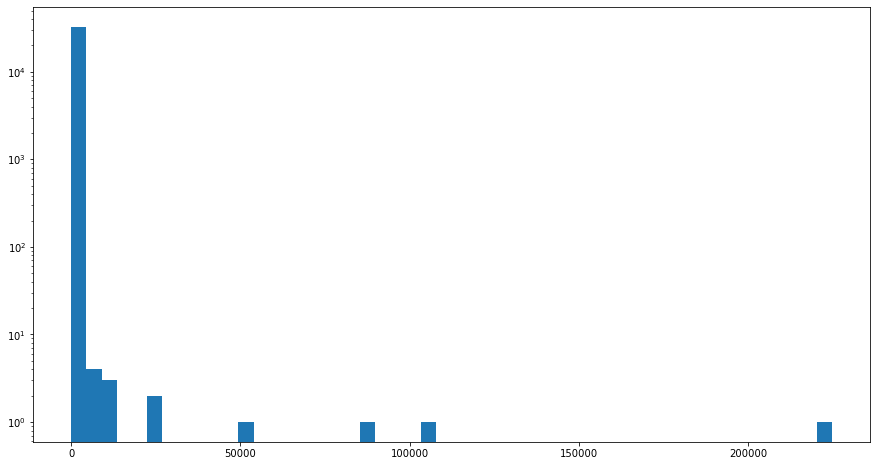

In [140]:
# 2.2 plt.hist
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (15,8))
plt.hist(inteval, 50, log=True)
plt.show

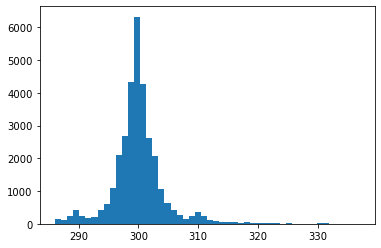

In [141]:
plt.hist(inteval[(inteval>inteval.quantile(0.01))&(inteval<inteval.quantile(0.99))], 50)
plt.show()

### 3. 求如下指标对应的Series：

1. 温度与辐射量的6小时滑动相关系数
2. 以三点、九点、十五点、二十一点为分割，该观测所在时间区间的温度均值序列
3. 每个观测6小时前的辐射量（一般而言不会恰好取到，此时取最近时间戳对应的辐射量）

In [142]:
# 3.1
df.Radiation.rolling('6H').corr(df.Temperature).head()

Datetime
2016-09-01 00:00:08    NaN
2016-09-01 00:05:10    NaN
2016-09-01 00:20:06    inf
2016-09-01 00:25:05   -inf
2016-09-01 00:30:09   -inf
dtype: float64

In [143]:
# 3.2
df.Temperature.resample('6H', origin='03:00:00').mean().head()

Datetime
2016-08-31 21:00:00    51.218750
2016-09-01 03:00:00    50.033333
2016-09-01 09:00:00    59.379310
2016-09-01 15:00:00    57.984375
2016-09-01 21:00:00    51.393939
Freq: 6H, Name: Temperature, dtype: float64

In [144]:
# 3.3
df.loc[df.index.to_series().reindex(df.index.shift(freq='-6H'),method='nearest'),'Radiation'].tail()

Datetime
2016-12-31 17:35:01    15.96
2016-12-31 17:40:06    11.98
2016-12-31 17:45:02     9.33
2016-12-31 17:50:01     8.49
2016-12-31 17:55:02     5.84
Name: Radiation, dtype: float64

### Ex2：水果销量数据集
现有一份2019年每日水果销量记录表：

In [145]:
df = pd.read_csv('fruit.csv')
df.head()

,Date,Fruit,Sale
0,2019-04-18,Peach,15
1,2019-12-29,Peach,15
2,2019-06-05,Peach,19
3,2019-10-28,Pear,19
4,2019-06-11,Peach,5


### 1. 统计如下指标：

1. 每月上半月（15号及之前）与下半月葡萄销量的比值
2. 每月最后一天的生梨销量总和
3. 每月最后一天工作日的生梨销量总和
4. 每月最后五天的苹果销量均值

In [146]:
df['Fruit'].value_counts()

Peach     5665
Grape     4368
Pear      3944
Apple     3657
Banana    2366
Name: Fruit, dtype: int64

In [147]:
df.Date = pd.to_datetime(df.Date)
df.set_index('Date', inplace=True)
df.head()

,Fruit,Sale
Date,,
2019-04-18,Peach,15
2019-12-29,Peach,15
2019-06-05,Peach,19
2019-10-28,Pear,19
2019-06-11,Peach,5


In [149]:
sale_volume = df.loc[df.Fruit=='Grape','Sale'].resample('SM',closed='right').count()
pd.Series(sale_volume[::2].values/sale_volume[1::2].values,index=sale_volume[::2].index.month).rename_axis('Month').head()

Month
12    1.000000
1     1.042945
2     0.816038
3     1.005435
4     0.967213
dtype: float64

In [150]:
# 2. 每月最后一天的生梨销量总和
df.loc[(df.Fruit=='Pear')&(df.index.is_month_end),'Sale'].resample('M').sum().head()

Date
2019-01-31    847
2019-02-28    774
2019-03-31    761
2019-04-30    648
2019-05-31    616
Freq: M, Name: Sale, dtype: int64

In [151]:
# 3. 
df[df.Fruit=='Pear'].loc[pd.date_range(df.index.min(),df.index.max(),freq='BM'),'Sale'].resample('M').sum().head()

Date
2019-01-31    847
2019-02-28    774
2019-03-31    510
2019-04-30    648
2019-05-31    616
Freq: M, Name: Sale, dtype: int64

In [152]:
# 4. 
apple = df[df.Fruit=='Apple']
apple_mean = apple.loc[apple.index.day>apple.index.daysinmonth-5,'Sale'].resample('M').mean()
apple_mean.index = apple_mean.rename_axis('Month').index.month
apple_mean.head()

Month
1    65.313725
2    54.061538
3    59.325581
4    65.795455
5    57.465116
Name: Sale, dtype: float64

### 2. 按月计算周一至周日各品种水果的平均记录条数，行索引外层为水果名称，内层为月份，列索引为星期

In [153]:
res = pd.crosstab([df.Fruit, df.index.month_name()], df.index.day_name())
res.iloc[(np.arange(res.index.get_level_values(0).nunique()).reshape(-1,1) * 12
          + np.array([4,3,7,0,8,6,5,1,11,10,9,2])).flatten(), 
         [1,5,6,4,0,2,3]].rename_axis(index={'row_1':'Month'},columns={'col_0':'Week'}).head()

Week            Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday
Fruit Month                                                                   
Apple January       46       50         50        45      32        42      23
      February      43       40         47        35      33        38      45
      March         43       44         37        31      52        42      42
      April         47       52         43        47      31        35      37
      May           43       46         39        58      46        55      31